In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API Key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 2 of Set 12 | hasaki
Processing Record 3 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 12 | hermanus
Processing Record 5 of Set 12 | tiznit
Processing Record 6 of Set 12 | hambantota
Processing Record 7 of Set 12 | ushuaia
Processing Record 8 of Set 12 | santa isabel
Processing Record 9 of Set 12 | dikson
Processing Record 10 of Set 12 | rikitea
Processing Record 11 of Set 12 | cidreira
Processing Record 12 of Set 12 | saleaula
City not found. Skipping...
Processing Record 13 of Set 12 | albany
Processing Record 14 of Set 12 | punta arenas
Processing Record 15 of Set 12 | ocean springs
Processing Record 16 of Set 12 | tiksi
Processing Record 17 of Set 12 | korla
Processing Record 18 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 12 | daura
Processing Record 20 of Set 12 | 

Processing Record 34 of Set 15 | bagdarin
Processing Record 35 of Set 15 | mafinga
Processing Record 36 of Set 15 | auki
Processing Record 37 of Set 15 | nishihara
Processing Record 38 of Set 15 | charagua
Processing Record 39 of Set 15 | najran
Processing Record 40 of Set 15 | pevek
Processing Record 41 of Set 15 | kabalo
Processing Record 42 of Set 15 | galgani
City not found. Skipping...
Processing Record 43 of Set 15 | amderma
City not found. Skipping...
Processing Record 44 of Set 15 | mar del plata
Processing Record 45 of Set 15 | miranda
Processing Record 46 of Set 15 | shingu
Processing Record 47 of Set 15 | codrington
Processing Record 48 of Set 15 | alofi
Processing Record 49 of Set 15 | saskylakh
Processing Record 50 of Set 15 | basco
Processing Record 1 of Set 16 | kavaratti
Processing Record 2 of Set 16 | port alfred
Processing Record 3 of Set 16 | peniche
Processing Record 4 of Set 16 | faya
Processing Record 5 of Set 16 | kamenka
Processing Record 6 of Set 16 | kruisfont

Processing Record 16 of Set 19 | naro moru
Processing Record 17 of Set 19 | dalvik
Processing Record 18 of Set 19 | kjollefjord
Processing Record 19 of Set 19 | ocos
Processing Record 20 of Set 19 | avera
Processing Record 21 of Set 19 | karaton
Processing Record 22 of Set 19 | garowe
Processing Record 23 of Set 19 | sao felix do xingu
Processing Record 24 of Set 19 | nautla
Processing Record 25 of Set 19 | aloleng
Processing Record 26 of Set 19 | vyshhorod
Processing Record 27 of Set 19 | torbay
Processing Record 28 of Set 19 | zhanaozen
Processing Record 29 of Set 19 | rochester
Processing Record 30 of Set 19 | saint-leu
Processing Record 31 of Set 19 | burica
City not found. Skipping...
Processing Record 32 of Set 19 | novyye lyady
Processing Record 33 of Set 19 | kargopol
Processing Record 34 of Set 19 | riyadh
Processing Record 35 of Set 19 | chancay
Processing Record 36 of Set 19 | chincha alta
Processing Record 37 of Set 19 | dien bien
City not found. Skipping...
Processing Reco

Processing Record 50 of Set 22 | ulladulla
Processing Record 1 of Set 23 | ibipeba
Processing Record 2 of Set 23 | amboasary
Processing Record 3 of Set 23 | iqaluit
Processing Record 4 of Set 23 | sadovoye
Processing Record 5 of Set 23 | trat
Processing Record 6 of Set 23 | mukhen
Processing Record 7 of Set 23 | bakchar
Processing Record 8 of Set 23 | kavieng
Processing Record 9 of Set 23 | khonuu
City not found. Skipping...
Processing Record 10 of Set 23 | fuerte olimpo
Processing Record 11 of Set 23 | tabou
Processing Record 12 of Set 23 | te anau
Processing Record 13 of Set 23 | chernyshevskiy
Processing Record 14 of Set 23 | lively
Processing Record 15 of Set 23 | nagorsk
Processing Record 16 of Set 23 | wasilla
Processing Record 17 of Set 23 | diamantino
Processing Record 18 of Set 23 | vila
Processing Record 19 of Set 23 | presidencia roque saenz pena
Processing Record 20 of Set 23 | arvi
Processing Record 21 of Set 23 | vanavara
Processing Record 22 of Set 23 | mayo
Processing R

In [8]:
len(city_data)

532

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.73,140.83,54.00,93,75,5.82,JP,2020-10-19 17:50:18
1,Hermanus,-34.42,19.23,57.99,77,76,3.00,ZA,2020-10-19 17:50:18
2,Tiznit,29.58,-9.50,76.12,28,0,0.65,MA,2020-10-19 17:50:18
3,Hambantota,6.12,81.12,80.28,77,89,19.44,LK,2020-10-19 17:50:18
4,Ushuaia,-54.80,-68.30,39.20,86,75,34.45,AR,2020-10-19 17:50:18
5,Santa Isabel,-23.32,-46.22,82.40,48,75,4.70,BR,2020-10-19 17:50:18
6,Dikson,73.51,80.55,23.92,95,94,19.04,RU,2020-10-19 17:50:19
7,Rikitea,-23.12,-134.97,73.83,79,0,14.88,PF,2020-10-19 17:50:19
8,Cidreira,-30.18,-50.21,72.77,74,0,14.16,BR,2020-10-19 17:50:19
9,Albany,42.60,-73.97,60.01,69,85,7.27,US,2020-10-19 17:50:19


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2020-10-19 17:50:18,35.73,140.83,54.00,93,75,5.82
1,Hermanus,ZA,2020-10-19 17:50:18,-34.42,19.23,57.99,77,76,3.00
2,Tiznit,MA,2020-10-19 17:50:18,29.58,-9.50,76.12,28,0,0.65
3,Hambantota,LK,2020-10-19 17:50:18,6.12,81.12,80.28,77,89,19.44
4,Ushuaia,AR,2020-10-19 17:50:18,-54.80,-68.30,39.20,86,75,34.45
5,Santa Isabel,BR,2020-10-19 17:50:18,-23.32,-46.22,82.40,48,75,4.70
6,Dikson,RU,2020-10-19 17:50:19,73.51,80.55,23.92,95,94,19.04
7,Rikitea,PF,2020-10-19 17:50:19,-23.12,-134.97,73.83,79,0,14.88
8,Cidreira,BR,2020-10-19 17:50:19,-30.18,-50.21,72.77,74,0,14.16
9,Albany,US,2020-10-19 17:50:19,42.60,-73.97,60.01,69,85,7.27


In [11]:
# Create the ouput file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/19/20'

<function matplotlib.pyplot.show(close=None, block=None)>

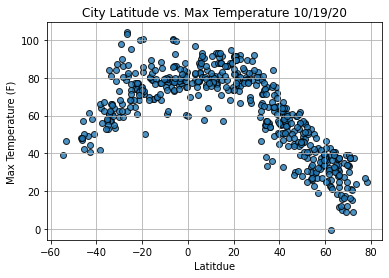

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
          max_temps,
          edgecolor="black", linewidths=1, marker="o",
          alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitdue")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show

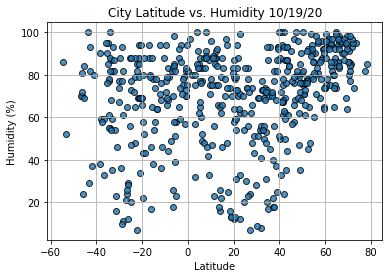

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

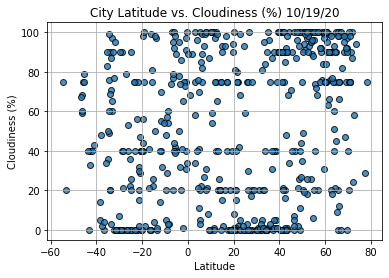

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

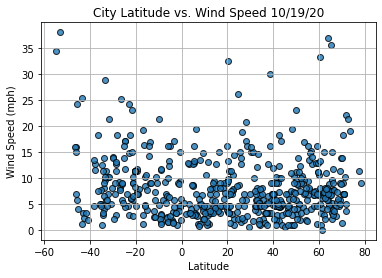

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()